In [1]:
%matplotlib inline
import yt
import yt.units as unit
import matplotlib.pyplot as plt
from yt.analysis_modules.halo_analysis.api import *
import ls_cf

/Users/Oleg/yt-x86_64/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-macosx-10.4-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
path='/Users/Oleg/Rockstar/'   ##Put here the directory where to find the file

In [4]:
ds1=yt.GadgetDataset(path+"snapshot_101")   ##Add name of file

yt : [INFO     ] 2017-06-14 22:23:07,601 Calculating time from 1.000e+00 to be 4.250e+17 seconds
yt : [INFO     ] 2017-06-14 22:23:07,603 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2017-06-14 22:23:07,653 Parameters: current_time              = 4.2498606916e+17 s
yt : [INFO     ] 2017-06-14 22:23:07,655 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-06-14 22:23:07,657 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-06-14 22:23:07,664 Parameters: domain_right_edge         = [ 500000.  500000.  500000.]
yt : [INFO     ] 2017-06-14 22:23:07,671 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-06-14 22:23:07,674 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-06-14 22:23:07,676 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2017-06-14 22:23:07,682 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2017-06-14 22:23:07,684 Parameters: hubble_constant           = 0.7

In [5]:
p1 = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')

yt : [INFO     ] 2017-06-14 22:23:07,709 Allocating for 2.097e+06 particles (index particle type 'all')
yt : [INFO     ] 2017-06-14 22:23:08,063 Identified 1.422e+05 octs
yt : [INFO     ] 2017-06-14 22:23:08,555 xlim = 0.000000 500000.000000
yt : [INFO     ] 2017-06-14 22:23:08,555 ylim = 0.000000 500000.000000
yt : [INFO     ] 2017-06-14 22:23:08,557 xlim = 0.000000 500000.000000
yt : [INFO     ] 2017-06-14 22:23:08,558 ylim = 0.000000 500000.000000
yt : [INFO     ] 2017-06-14 22:23:08,559 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh



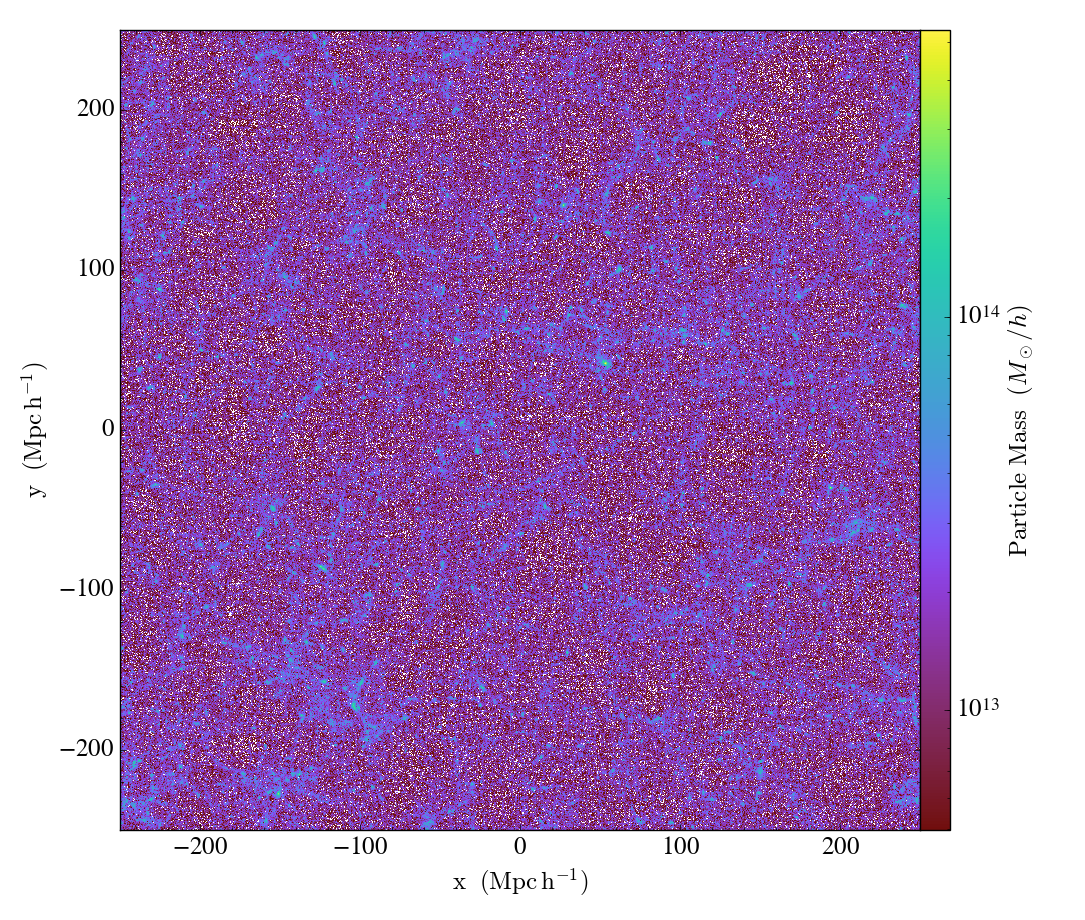

In [6]:
p1.set_axes_unit('Mpc/h')
p1.set_unit('particle_mass', 'Msun/h')


In [7]:
ad_data = ds1.all_data()

In [8]:
print ad_data['particle_position_x']

[  849.72619629  1601.20812988  1748.53710938 ...,  3769.66113281
  3240.30078125  1685.45373535] code_length


In [9]:
print ad_data['particle_position_x'].in_units('Mpc/h')

[ 0.8497262   1.60120813  1.74853711 ...,  3.76966113  3.24030078
  1.68545374] Mpc/h


In [10]:
p_x = ad_data['particle_position_x'].in_units('Mpc/h')
p_y = ad_data['particle_position_y'].in_units('Mpc/h')
p_z = ad_data['particle_position_z'].in_units('Mpc/h')
pos = np.array([p_x, p_y, p_z]).T
#np.savetxt('positions.dat',pos)

In [11]:
print p_x

[ 0.8497262   1.60120813  1.74853711 ...,  3.76966113  3.24030078
  1.68545374] Mpc/h


In [12]:
print np.shape(pos)

(2097152, 3)


box = 50.
n_bin = int(np.sqrt(len(p_x)))

hist = corr2.corr2(pos, int(box), n_bin, model=1)

In [13]:
halos  = yt.load(path+'halos_0.0.bin')

yt : [INFO     ] 2017-06-14 22:23:12,012 Parameters: current_time              = 4.24986071675e+17 s
yt : [INFO     ] 2017-06-14 22:23:12,013 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-06-14 22:23:12,016 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-06-14 22:23:12,022 Parameters: domain_right_edge         = [ 500.  500.  500.]
yt : [INFO     ] 2017-06-14 22:23:12,026 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-06-14 22:23:12,027 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-06-14 22:23:12,029 Parameters: omega_lambda              = 0.699999988079
yt : [INFO     ] 2017-06-14 22:23:12,030 Parameters: omega_matter              = 0.300000011921
yt : [INFO     ] 2017-06-14 22:23:12,032 Parameters: hubble_constant           = 0.699999988079


In [14]:
hc = HaloCatalog(halos_ds = halos)
hc.load()

yt : [INFO     ] 2017-06-14 22:23:12,046 Allocating for 4.235e+03 particles (index particle type 'all')
yt : [INFO     ] 2017-06-14 22:23:12,061 Identified 8.970e+02 octs


yt : [INFO     ] 2017-06-14 22:23:14,157 xlim = 0.000000 500000.000000
yt : [INFO     ] 2017-06-14 22:23:14,159 ylim = 0.000000 500000.000000
yt : [INFO     ] 2017-06-14 22:23:14,162 xlim = 0.000000 500000.000000
yt : [INFO     ] 2017-06-14 22:23:14,163 ylim = 0.000000 500000.000000
yt : [INFO     ] 2017-06-14 22:23:14,165 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh



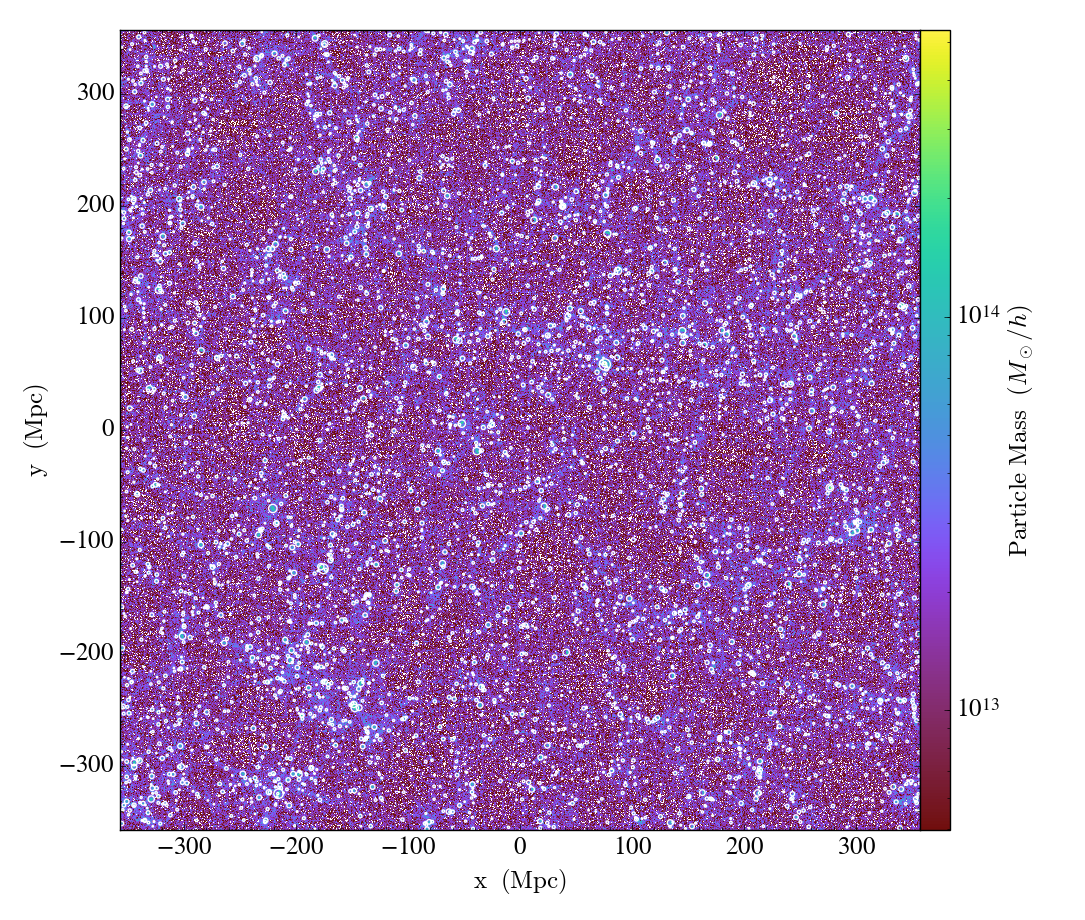

In [15]:
p2 = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')
p2.annotate_halos(hc)
p2.set_axes_unit('Mpc')
p2.set_unit('particle_mass', 'Msun/h')


In [16]:
import tempfile
import shutil
import os

tmpdir = tempfile.mkdtemp()

In [17]:
hc2 = HaloCatalog(data_ds = ds1, halos_ds= halos, 
                  output_dir = os.path.join(tmpdir,'halo_catalog'))

In [18]:
hc2.add_filter("quantity_value","particle_mass",">",1e12,"Msun/h")

In [19]:
hc2.create()

yt : [INFO     ] 2017-06-14 22:23:21,254 Saving halo catalog (4235 halos) to /var/folders/c8/vqw4f0692sq917vygxcr3gzc0000gn/T/tmpqdaiAI/halo_catalog/halo_catalog.
yt : [INFO     ] 2017-06-14 22:23:21,265 Saving field data to yt dataset: /var/folders/c8/vqw4f0692sq917vygxcr3gzc0000gn/T/tmpqdaiAI/halo_catalog/halo_catalog.0.h5.


In [20]:
halos_ds1 = yt.load(os.path.join(tmpdir,'halo_catalog/halo_catalog.0.h5'))

hc_r = HaloCatalog(halos_ds=halos_ds1, 
                  output_dir=os.path.join(tmpdir,'halo_catalog'))
hc_r.load()

yt : [INFO     ] 2017-06-14 22:23:21,350 Parameters: current_time              = 4.24986071675e+17
yt : [INFO     ] 2017-06-14 22:23:21,351 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-06-14 22:23:21,352 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-06-14 22:23:21,354 Parameters: domain_right_edge         = [  2.20405545e+27   2.20405545e+27   2.20405545e+27]
yt : [INFO     ] 2017-06-14 22:23:21,355 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-06-14 22:23:21,356 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-06-14 22:23:21,356 Parameters: omega_lambda              = 0.699999988079
yt : [INFO     ] 2017-06-14 22:23:21,357 Parameters: omega_matter              = 0.300000011921
yt : [INFO     ] 2017-06-14 22:23:21,358 Parameters: hubble_constant           = 0.699999988079
yt : [INFO     ] 2017-06-14 22:23:21,364 Allocating for 4.235e+03 particles (index particle type 'all')
yt : [INFO     ] 2017-0

yt : [INFO     ] 2017-06-14 22:23:23,580 xlim = 0.000000 500000.000000
yt : [INFO     ] 2017-06-14 22:23:23,582 ylim = 0.000000 500000.000000
yt : [INFO     ] 2017-06-14 22:23:23,585 xlim = 0.000000 500000.000000
yt : [INFO     ] 2017-06-14 22:23:23,586 ylim = 0.000000 500000.000000
yt : [INFO     ] 2017-06-14 22:23:23,588 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh



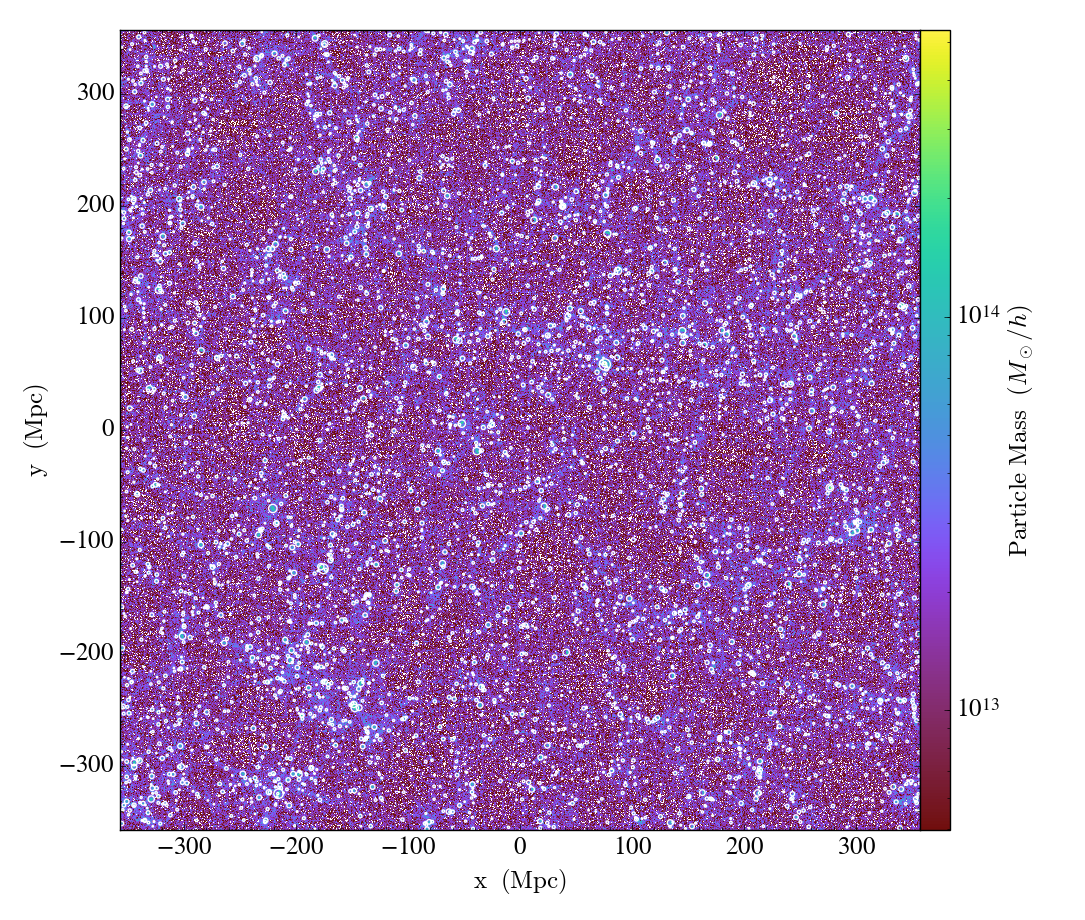

In [21]:
p3 = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')
p3.annotate_halos(hc_r)
p3.set_axes_unit('Mpc')
p3.set_unit('particle_mass', 'Msun/h')


In [22]:
import seaborn as sb
sb.set_style('white')

In [23]:
ad_halos = halos.all_data()

1.41799444203e+13 Msun


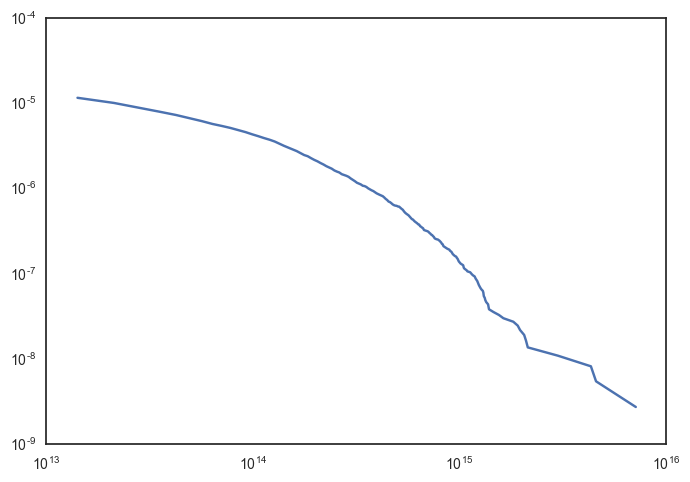

In [24]:
m_halos = np.sort(ad_halos["particle_mass"].in_units("Msun"))
print m_halos[0]
vol = (500.0/0.7)**3
n_density = np.arange(len(m_halos),0,-1)

m_halos, u_index = np.unique(m_halos, return_index=True)
n_density = n_density[u_index]/vol
#print n_density
plt.loglog(m_halos,n_density)

In [25]:
print min(m_halos) , max(m_halos)

1.41799444203e+13 Msun 7.13251195654e+15 Msun


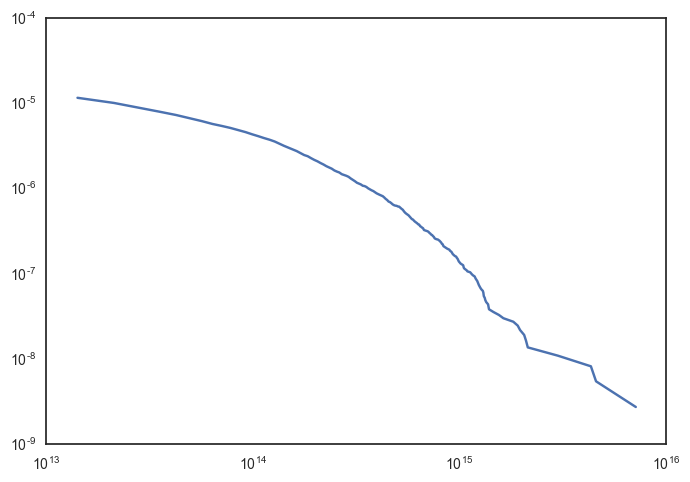

In [26]:
from yt.analysis_modules.halo_mass_function.api import *
hmf = HaloMassFcn(halos_ds=halos,omega_matter0=0.3,omega_lambda0=0.7,hubble0=0.7,log_mass_min=13.,log_mass_max=16., fitting_function=4)

#print hmf.n_cumulative_sim
plt.loglog(hmf.masses_sim, hmf.n_cumulative_sim)

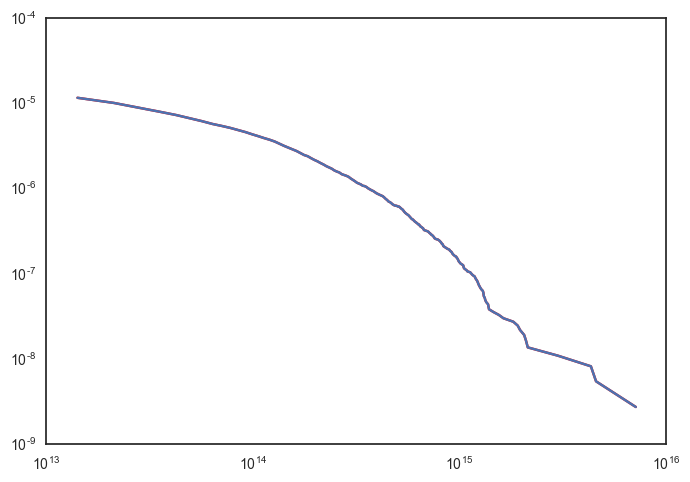

In [27]:
plt.figure()
plt.loglog(m_halos,n_density,'r')
plt.loglog(hmf.masses_sim, hmf.n_cumulative_sim)

In [28]:
print hmf.n_cumulative_sim.size

166


(1e-08, 0.001)

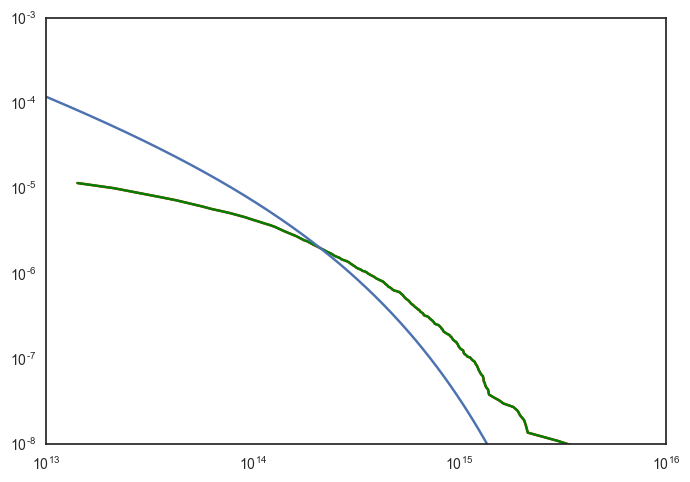

In [29]:
plt.figure()
m_halos = np.sort(ad_halos["particle_mass"].in_units("Msun"))
#print m_halos[0]
vol = (500./0.7)**3.
n_density = np.arange(len(m_halos),0,-1)
#print n_density
m_halos, u_index = np.unique(m_halos, return_index=True)
n_density = n_density[u_index]/vol
plt.loglog(m_halos,n_density,'r')
plt.loglog(hmf.masses_sim, hmf.n_cumulative_sim,'g')
plt.loglog(hmf.masses_analytic, hmf.n_cumulative_analytic)

plt.ylim(1e-8,1e-3)

In [30]:
mass3 = (hmf.dndM_dM_analytic) * (hmf.masses_analytic)

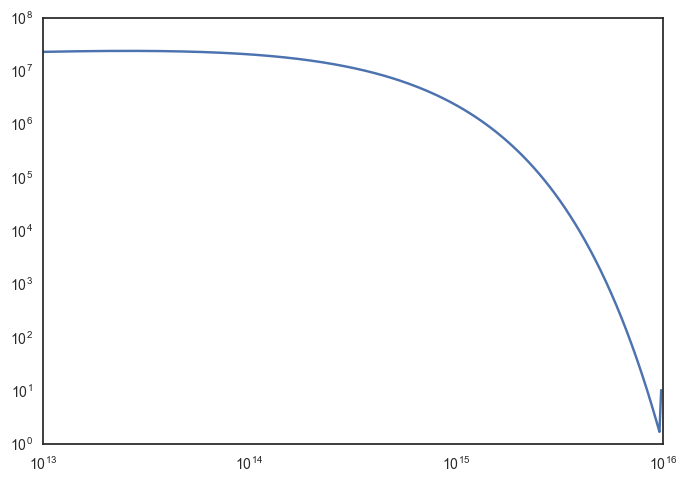

In [31]:
plt.loglog(hmf.masses_analytic,mass3);

In [32]:
pos_x = ad_halos["particle_position_x"].in_units("Mpc/h")
pos_y = ad_halos["particle_position_y"].in_units("Mpc/h")
pos_z = ad_halos["particle_position_z"].in_units("Mpc/h")

halos_p = np.array([pos_x, pos_y, pos_z]).T
np.savetxt('halos_p.txt', halos_p)

In [33]:
print np.shape

<function shape at 0x10473c320>


In [34]:
print pos_x[:5]
D = pow(halos_p[0,:] - halos_p[1:,:],2)
print np.sum(D,axis=0)
print D[0]+D[1]+D[2]

[ 22.83804512   9.69102859   9.52661419   8.73804188  47.87694168] Mpc/h
[  3.06896900e+08   2.91116737e+08   3.33351921e+08]
[ 548.84832839  340.9083816   277.24352097]


In [35]:
box = 500
n_bin = int(np.sqrt(len(pos_x)))

In [36]:
hist_p = ls_cf.corr2p(halos_p, box, 20, model = 1)

In [37]:
pos_d = ls_cf.binning2(box, 20, dim = 3)

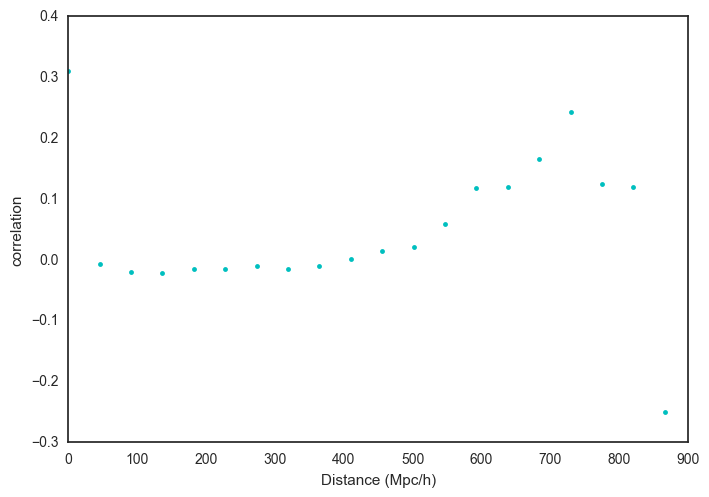

In [38]:
plt.plot(pos_d, hist_p,'.c');
plt.xlabel('Distance (Mpc/h)')
plt.ylabel('correlation')

In [39]:
hist_p2 = ls_cf.corr2p(halos_p, box, 20, model = 0)

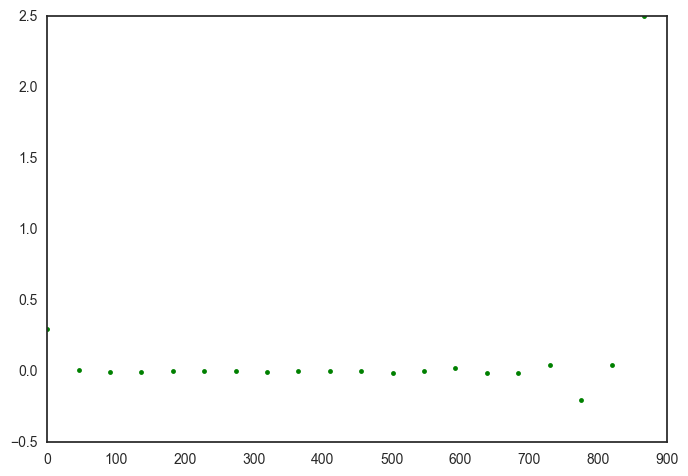

In [40]:
plt.plot(pos_d, hist_p2,'.g');

In [41]:
print hist_p2

[  2.98804413e-01   5.99149736e-03  -3.28749349e-03  -4.44708086e-03
   6.21064690e-04   1.69508220e-03  -8.88773132e-04  -4.40149208e-03
  -2.03338196e-04   6.49803569e-04   1.09134853e-03  -1.36057495e-02
  -1.16406712e-03   2.35624023e-02  -1.46988695e-02  -1.57453363e-02
   4.59358202e-02  -2.02127660e-01   4.70588235e-02   2.50000000e+00]


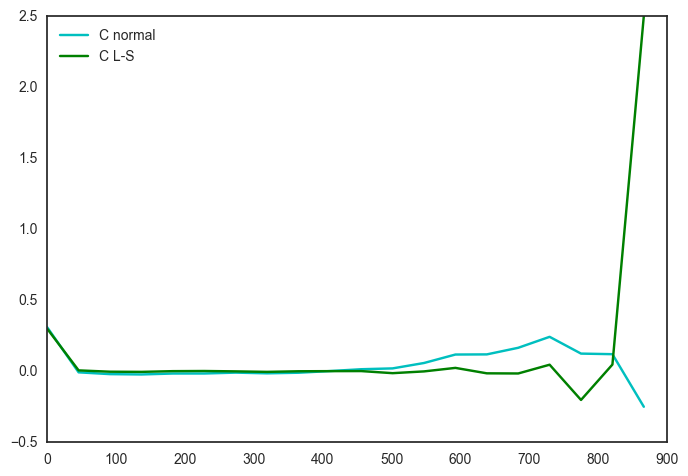

In [42]:
plt.figure()
plt.plot(pos_d,hist_p,'c',label = 'C normal')
plt.plot(pos_d,hist_p2,'g',label = 'C L-S')
plt.legend(loc='best')

In [50]:
data_100e3 = np.loadtxt('results_100e3.txt')
data500e3 = np.loadtxt('results_500.txt')

In [51]:
box = 500.
bins = 80
max_d = np.sqrt(3.0) * box
r = np.linspace(0.0, max_d, bins)
r2 = r**2

(-10.0, 15.0)

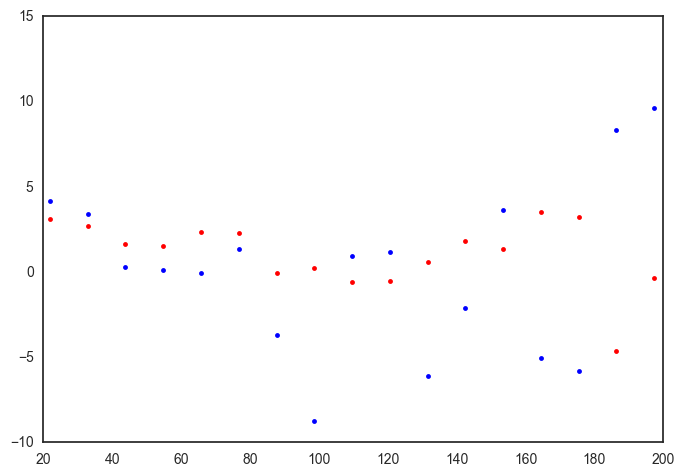

In [52]:
plt.plot(r, data_100e3*r2,'.',color='b');
plt.plot(r, data500e3*r2,'.r');
plt.xlim(20., 200.)
plt.ylim(-10., 15.0)
plt.xlabel('r(Mpc/h)');
plt.ylabel('r')

In [43]:
randoms_points = np.loadtxt('rand_sample.txt')

In [44]:
print np.shape(randoms_points), np.shape(randoms_points[0,:])

(3, 100000) (100000,)


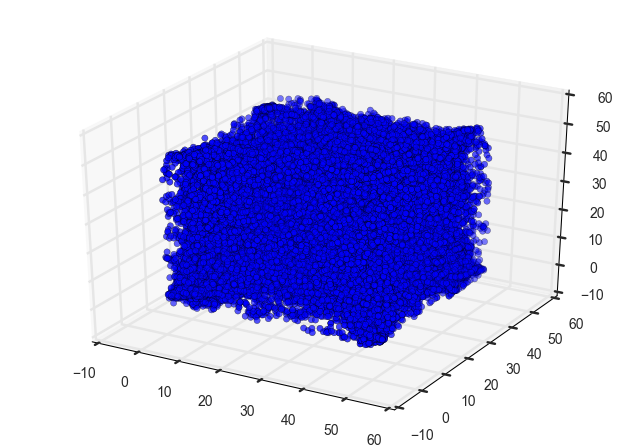

In [45]:
from mpl_toolkits.mplot3d import Axes3D
figure2 = plt.figure()
ax = figure2.add_subplot(111, projection='3d')
ax.scatter(randoms_points[0,:],randoms_points[1,:],randoms_points[2,:]);

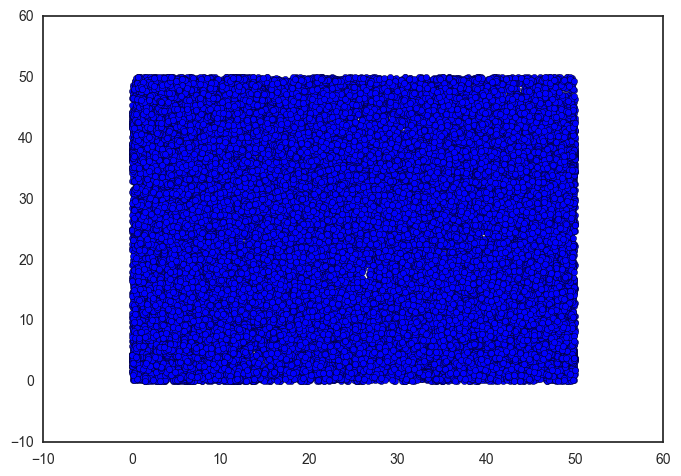

In [46]:
plt.scatter(randoms_points[0,:],randoms_points[1,:])

In [47]:
hist_sim = np.loadtxt('corr_funct.txt')

In [48]:
print np.shape(hist_sim)

(25,)


pos_d2 = ls_cf.binning2(box, 25, dim = 3)

r21 = pos_d2**2

plt.plot(pos_d2, hist_sim)

data_real = np.loadtxt('results_corr.txt')

print np.shape(data_real)

pos_d3 = corr2.binning(500., 520, dim = 3)

r2 = (pos_d3)**2

plt.plot(pos_d3,data_real*r2);
plt.xlim(0,500)

data_pos = np.loadtxt('Data.txt')

print np.shape(data_pos)

NameError: name 'data_pos' is not defined

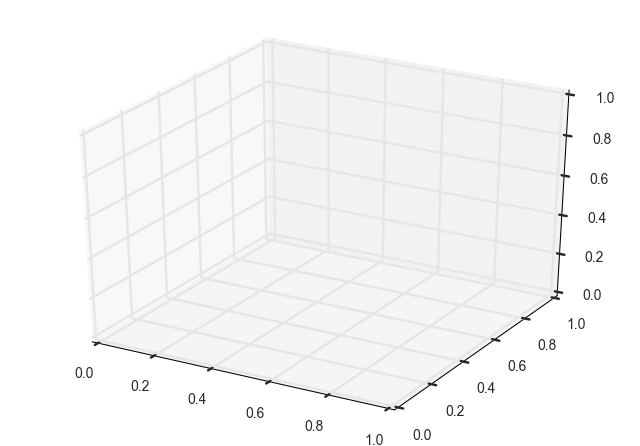

In [49]:
figure3 = plt.figure()
ax = figure3.add_subplot(111, projection='3d')
ax.scatter(data_pos[0,:],data_pos[1,:],data_pos[2,:]);

In [ ]:
plt.scatter(data_pos[0,:],data_pos[1,:]);

In [ ]:
print min(data_pos[0,:]), max(data_pos[0,:])
print min(data_pos[1,:]), max(data_pos[1,:])

In [ ]:
distance = max(data_pos[0,:]) - min(data_pos[0,:])


In [ ]:
max(data_pos[1,:]) - min(data_pos[1,:])

In [ ]:
print distance/np.sqrt(3.0)

Rands = np.loadtxt('Randoms.txt')

print np.shape(data_pos), np.shape(Rands)

print len(Rands)

print len(data_pos[0,:])

print np.shape(data_pos.T)

Rands = Rands.T
print len(Rands)

Rand_n=[]
for a,b,c in Rands[np.random.randint(len(Rands),size=len(data_pos.T))]:
    Rand_n.append(np.array([a,b,c]))
print np.shape(Rand_n)    

Rand_n = np.array(Rand_n)

print Rand_n[:10,0]

from corr_ls import corr_lsn

Rands = Rands.T
print len(Rands)

res = corr_lsn(data_pos, Rands,2617,520)